In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np

In [ ]:
def genTrunc(G,H,rho):
  G = nx.relabel.relabel_nodes(G,lambda x: "G"+str(x+1))
  ListGraphs = []
  for v in G.nodes:
    ListGraphs.append(nx.relabel.relabel_nodes(H,lambda x: v+"H"+str(x+1)))
  T = nx.compose_all(ListGraphs)
  for e in G.edges:
    x = e[0]+rho[e[0]][e[1]]
    y = e[1]+rho[e[1]][e[0]]
    T.add_edge(x,y)
  return T

In [ ]:
def getVertexNbhdLabelling(G):
  nds = list(map(lambda x: x,range(1,G.number_of_nodes()+1)))
  vnlList = {}
  for v in G.nodes:
    vnl = {}
    for (e,i) in zip(G[v],range(G.number_of_nodes()+1)):
      vnl[str("G"+str(e+1))] = str("H"+str(nds[i]))
    vnlList["G"+str(v+1)] = vnl
  return vnlList

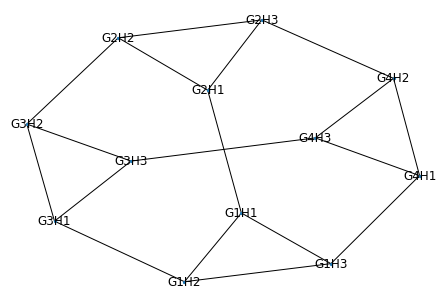

In [ ]:
n = 4
g = 3
# Example
G = nx.complete_graph(n)
H = nx.cycle_graph(g)
rho = getVertexNbhdLabelling(G)
T = genTrunc(G,H,rho)
nx.draw_spring(T, with_labels=True, node_size=5)